This notebook contains code to train a fully connected neural network on MNIST using tf.contrib.learn. At the end is a short exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster. 

In [3]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [6]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

In [ ]:
display(0)

In [ ]:
display(1)

These digits are clearly drawn. Here's one that's not.

In [ ]:
display(8)

Now let's take a look at how many features we have.

In [ ]:
print len(data[0])

## Fit a Linear Classifier

Our goal here is to get about 90% accuracy with this simple classifier. For more details on how these work, see https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [ ]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

## Evaluate accuracy

In [ ]:
classifier.evaluate(test_data, test_labels)["accuracy"]

## Classify a few examples

We can make predictions on individual images using the predict method

In [ ]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

In [ ]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

## Visualize learned weights


Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

In [ ]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

## Exercise: switch the estimator to a DNN

[7] 7
[2] 2
[1] 1
[0] 0
[4] 4
[1] 1
[4] 4
[9] 9
[6] 5
[9] 9


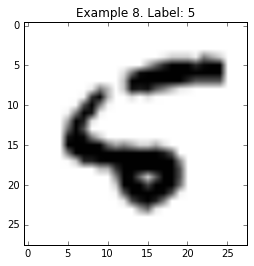

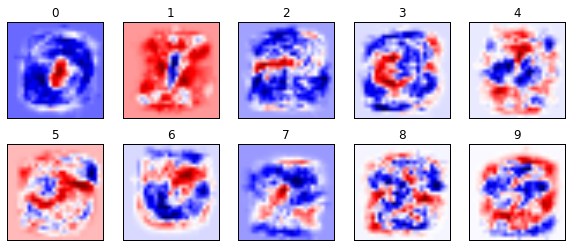

In [8]:
#uncomment all lines to run from scratch including loading data

#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
#import tensorflow as tf
#learn = tf.contrib.learn
#tf.logging.set_verbosity(tf.logging.ERROR)

#mnist = learn.datasets.load_dataset("mnist")
#data = mnist.train.images
#labels = np.asarray(mnist.train.labels, dtype = np.int32)
#test_data = mnist.test.images
#test_labels = np.asarray(mnist.test.labels, dtype = np.int32)

#max_examples = 10000
#data = data[:max_examples]
#labels = labels[:max_examples]

def display(idx):
    img = test_data[idx]
    plt.title("Example %d. Label: %d" % (idx, test_labels[idx]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

display(8)

#len(data[0])

feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns = feature_columns, n_classes = 10)
classifier.fit(data, labels, batch_size = 100, steps=1000)

classifier.evaluate(test_data, test_labels)["accuracy"]

for idx in range(10):
    print(classifier.predict(test_data[idx]), test_labels[idx])

weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize = (10,4))
axes = axes.reshape(-1)
for idx in range(len(axes)):
    a = axes[idx]
    a.imshow(weights.T[idx].reshape(28,28), cmap=plt.cm.seismic_r)
    a.set_title(idx)
    a.set_xticks(())
    a.set_yticks(())
plt.show()



In [11]:
np.shape(data), np.shape(labels)

((10000, 784), (10000,))

In [10]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=10)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[128, 32],
                                            n_classes=10,
                                            model_dir="/tmp/mnist_model")

classifier.fit(data, labels, batch_size=100, steps=1000)

#classifier.evaluate(test_data, test_labels)

InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [7840,10] and labels shape [100]
	 [[Node: sparse_softmax_cross_entropy_loss/xentropy/xentropy = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](BiasAdd, sparse_softmax_cross_entropy_loss/Reshape)]]

Caused by op 'sparse_softmax_cross_entropy_loss/xentropy/xentropy', defined at:
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3012, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-5a60dc68b0d1>", line 8, in <module>
    classifier.fit(data, labels, batch_size=100, steps=1000)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/dnn.py", line 435, in fit
    max_steps=max_steps)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 333, in fit
    max_steps=max_steps)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 662, in _train_model
    train_op, loss_op = self._get_train_ops(features, targets)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 963, in _get_train_ops
    _, loss, train_op = self._call_model_fn(features, targets, ModeKeys.TRAIN)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 944, in _call_model_fn
    return self._model_fn(features, targets, mode=mode, params=self.params)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/dnn.py", line 258, in _dnn_classifier_model_fn
    weight=_get_weight_tensor(features, weight_column_name))
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/contrib/losses/python/losses/loss_ops.py", line 417, in sparse_softmax_cross_entropy
    name="xentropy")
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 764, in sparse_softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1857, in _sparse_softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/soumyadsanyal/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): logits and labels must have the same first dimension, got logits shape [7840,10] and labels shape [100]
	 [[Node: sparse_softmax_cross_entropy_loss/xentropy/xentropy = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](BiasAdd, sparse_softmax_cross_entropy_loss/Reshape)]]


In [7]:
learn.DNNClassifier?

In [ ]:
# Build 2 layer DNN with 128, 32 units respectively.
# Play with these parameters to see if you can do better
# How? See https://www.tensorflow.org/versions/r0.11/tutorials/tflearn/index.html#tf-contrib-learn-quickstart

## Has our accuracy improved?

In [ ]:
classifier.evaluate(test_data, test_labels)["accuracy"]

# Next steps

* Visualizing MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* More about linear classifiers: http://cs231n.github.io/linear-classify/